In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

%matplotlib inline

In [2]:
# loading the data
latencies = pd.read_csv("results.csv").set_index("i")
latencies

,src,type,latency
i,,,
1,fair_coin,insert,7548
1,pe,insert,2220
1,p3,insert,1924
1,p4,insert,1924
2,fair_coin,insert,2035
...,...,...,...
4095,p4,remove,592
4096,fair_coin,remove,962
4096,pe,remove,703


In [3]:
inserts = latencies[latencies["type"] == "insert"]
sl_insert = inserts[inserts["src"] == "fair_coin"]
p_insert = inserts[inserts["src"] == "pe"]
p3_insert = inserts[inserts["src"] == "p3"]
p4_insert = inserts[inserts["src"] == "p4"]

In [4]:
gets = latencies[latencies["type"] == "search"]
sl_get = gets[gets["src"] == "fair_coin"]
p_get = gets[gets["src"] == "pe"]
p3_get = gets[gets["src"] == "p3"]
p4_get = gets[gets["src"] == "p4"]

In [5]:
removes = latencies[latencies["type"] == "remove"]
sl_remove = removes[removes["src"] == "fair_coin"]
p_remove = removes[removes["src"] == "pe"]
p3_remove = removes[removes["src"] == "p3"]
p4_remove = removes[removes["src"] == "p4"]

In [6]:
@dataclass
class PlotResult:
    fig: plt.Figure

def plot_latencies(sl, pe, p3, p4, type):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
    
    sl.plot(label="latencies (cycles)", ax=ax1)
    ax1.set_title("Fair coin")
    ax1.axhline(sl['latency'].mean(), color="orange", label=f"avg ({np.around(sl['latency'].mean(), 2)})")
    ax1.set_xlabel("")
    ax1.legend()

    pe.plot(label="latencies (cycles)", ax=ax2)
    ax2.set_title("$p = e$")
    ax2.axhline(pe["latency"].mean(), color="orange", label=f"avg ({np.around(pe['latency'].mean(), 2)})")
    ax2.set_xlabel("")
    ax2.legend()

    p3.plot(label="latencies (cycles)", ax=ax3)
    ax3.set_title("$p = 3$")
    ax3.axhline(p3["latency"].mean(), color="orange", label=f"avg ({np.around(p3['latency'].mean(), 2)})")
    ax3.set_xlabel("")
    ax3.legend()

    p4.plot(label="latencies (cycles)", ax=ax4)
    ax4.set_title("$p = 4$")
    ax4.axhline(p4["latency"].mean(), color="orange", label=f"avg ({np.around(p4['latency'].mean(), 2)})")
    ax4.set_xlabel("")
    ax4.legend()
    
    fig.savefig(f"../report/graphics/02-{type}-latencies.png", bbox_inches='tight')
    return PlotResult(fig)

# Insertion Latency

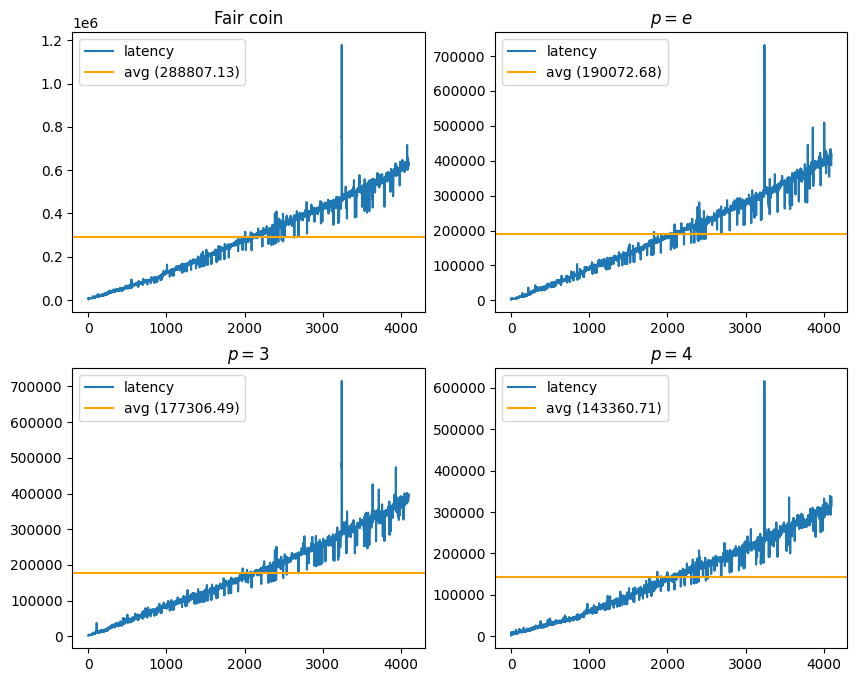

In [7]:
res = plot_latencies(sl_insert, p_insert, p3_insert, p4_insert, "insert")
plt.show(res.fig)

# Search Latency

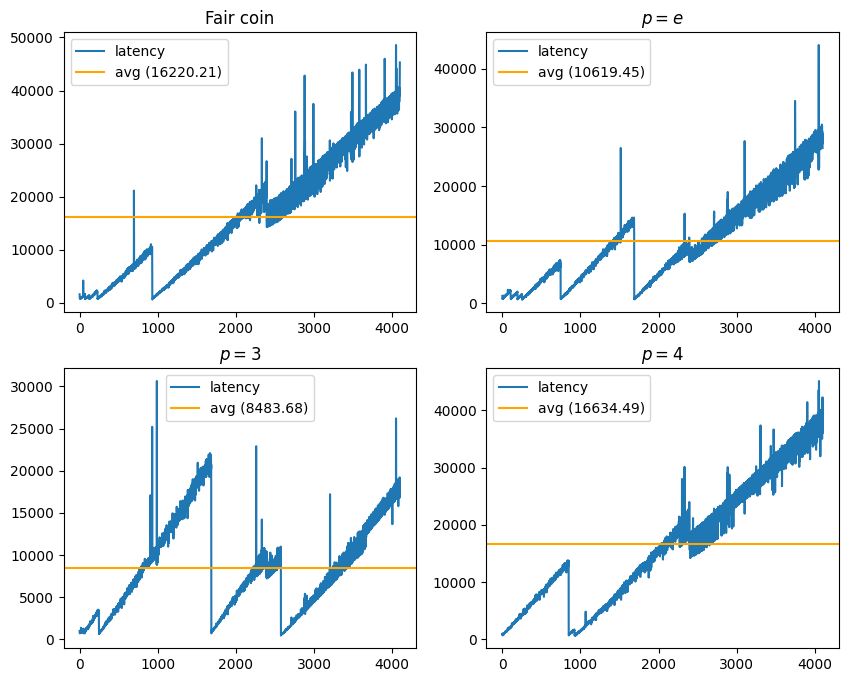

In [8]:
res = plot_latencies(sl_get, p_get, p3_get, p4_get, "search")
plt.show(res.fig)

# Deletion Latency

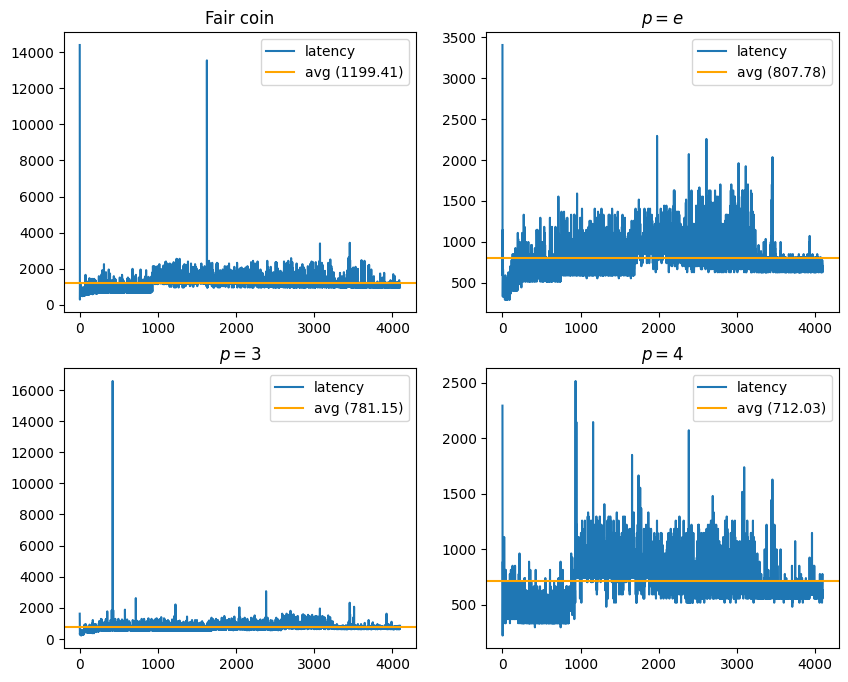

In [9]:
res = plot_latencies(sl_remove, p_remove, p3_remove, p4_remove, "delete")
plt.show(res.fig)